# Datathon Project

This notebook will cover the project for Datathon from Dphi 5-weeks bootcamp

In [33]:
#import the data set and python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

#import the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

# Explore the dataset

In [34]:
#Show the dataset information
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

As the dataset information showed above, there are some features has null values which are the freatures from A to Z and number of prev condition. In order to decide what action can be done to the null values let's do some preanalysis first.

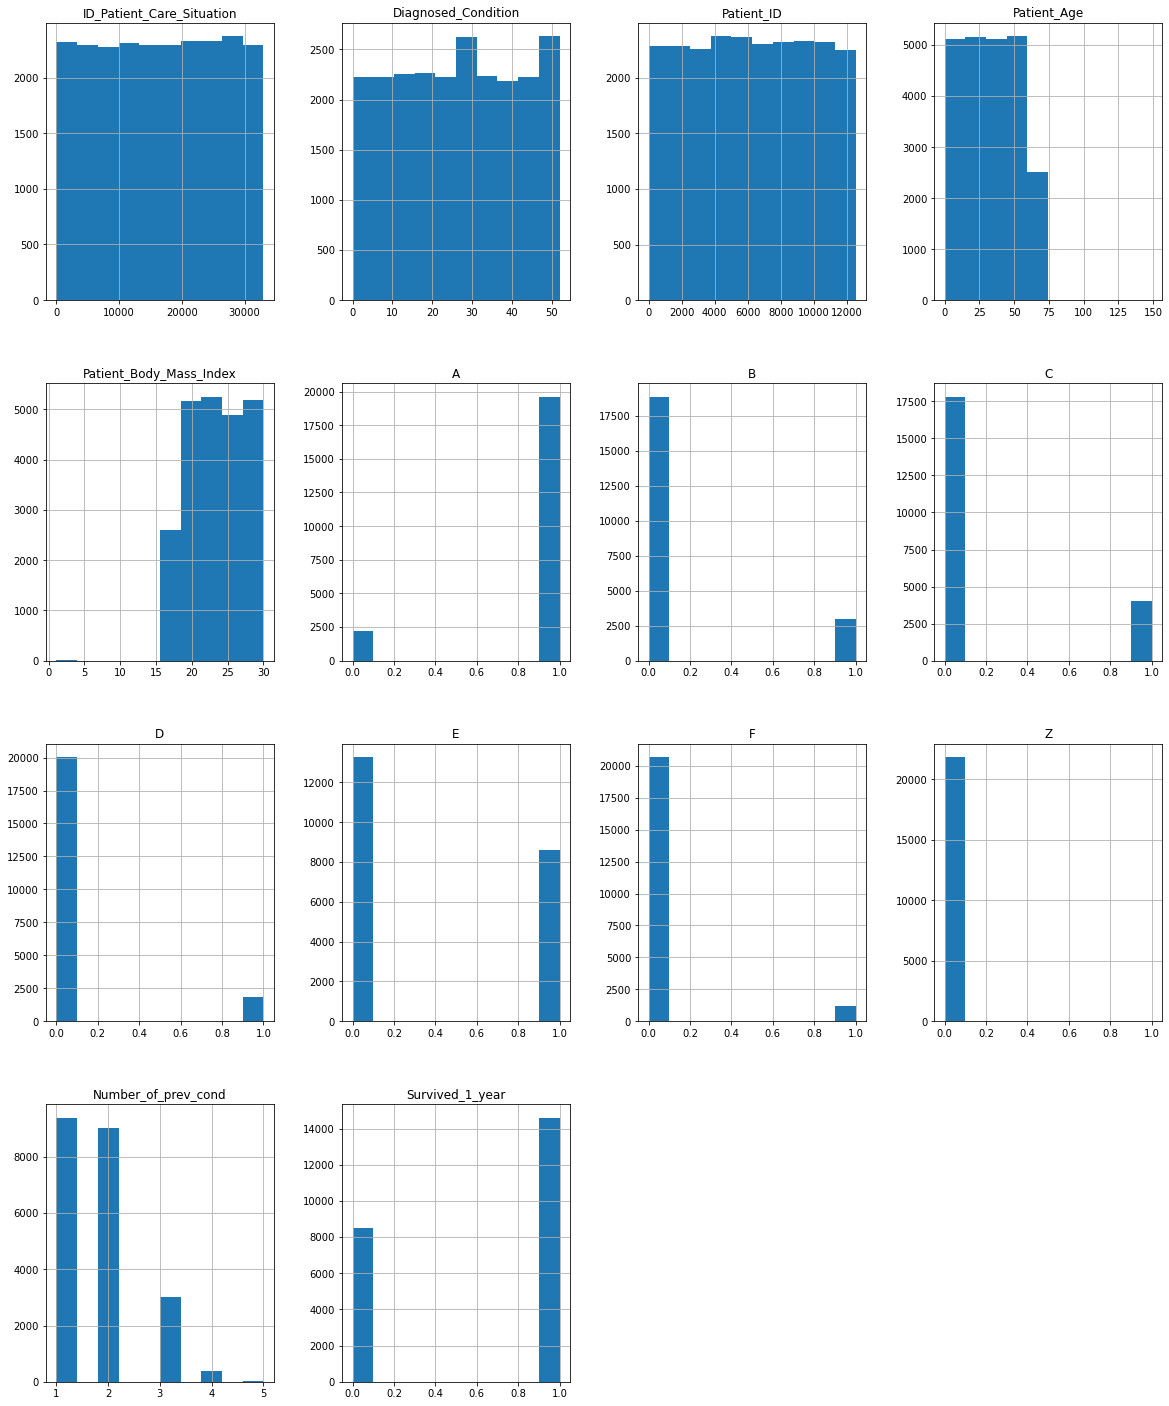

In [35]:
#Show the histograme for the numeric data
_ = pharma_data.hist(figsize=(20,25))

From the above Histograms we can see the following:
1. The patient age and patient body mass aren't normally distirbuted so it will be bettet to scale them before applying our final algorithm
2. The conditions A-Z aren't well balanced execpet the E condition so we can see teh corrleation between them after to decide if we will keep them or not.
3. Patient Id and patient care situation are required to be more investigated to see the values assocaited to them
4. The target survived_1_year are in good balance seems two third are equal to 1 and one third equal to 0

In [36]:
#Investigate the values of Patient Id, patioen care situation and Diagnosed condtion
pharma_data["ID_Patient_Care_Situation"].value_counts()

22374    1
1120     1
8066     1
21018    1
29140    1
        ..
19731    1
13542    1
15156    1
31420    1
3947     1
Name: ID_Patient_Care_Situation, Length: 23097, dtype: int64

From the above count we can say the Patient care situation can be dropped as it has 23097 unique values

In [37]:
pharma_data["Patient_ID"].value_counts()

9178     9
10652    8
6095     8
292      8
7707     8
        ..
10050    1
7557     1
5679     1
5019     1
5764     1
Name: Patient_ID, Length: 10570, dtype: int64

Although the patient id has several duplicates which mean the same patient entered the hospital severla times, we can say the ID itslef as a feature could be dropped as it shouldn't affect the patient conditions
Now let's have a look on the categrical data.

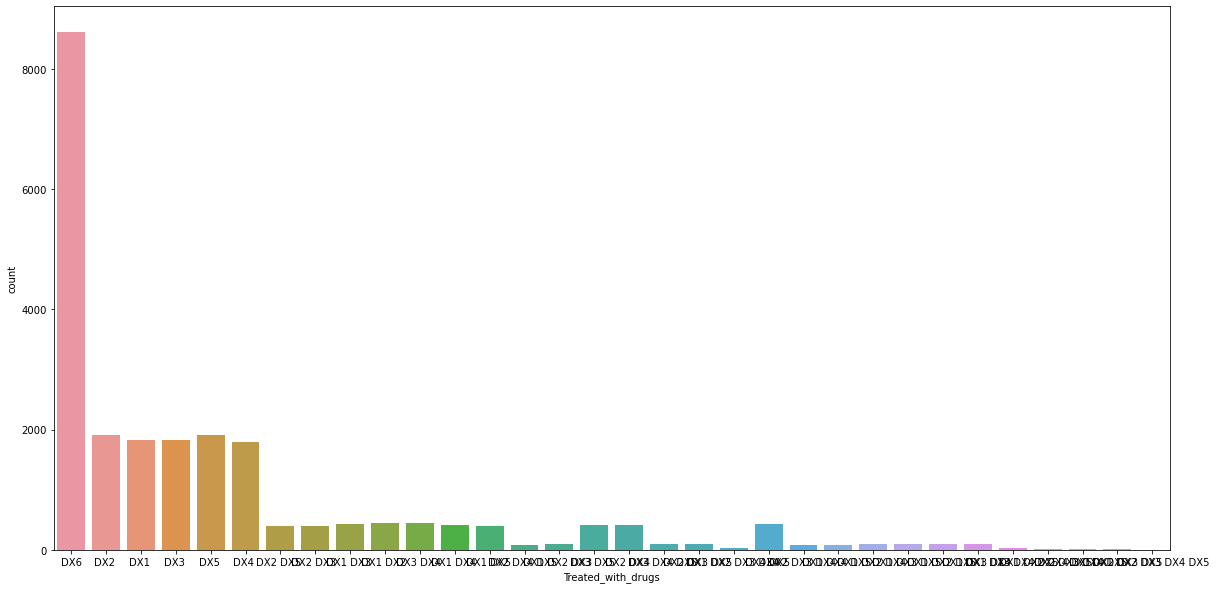

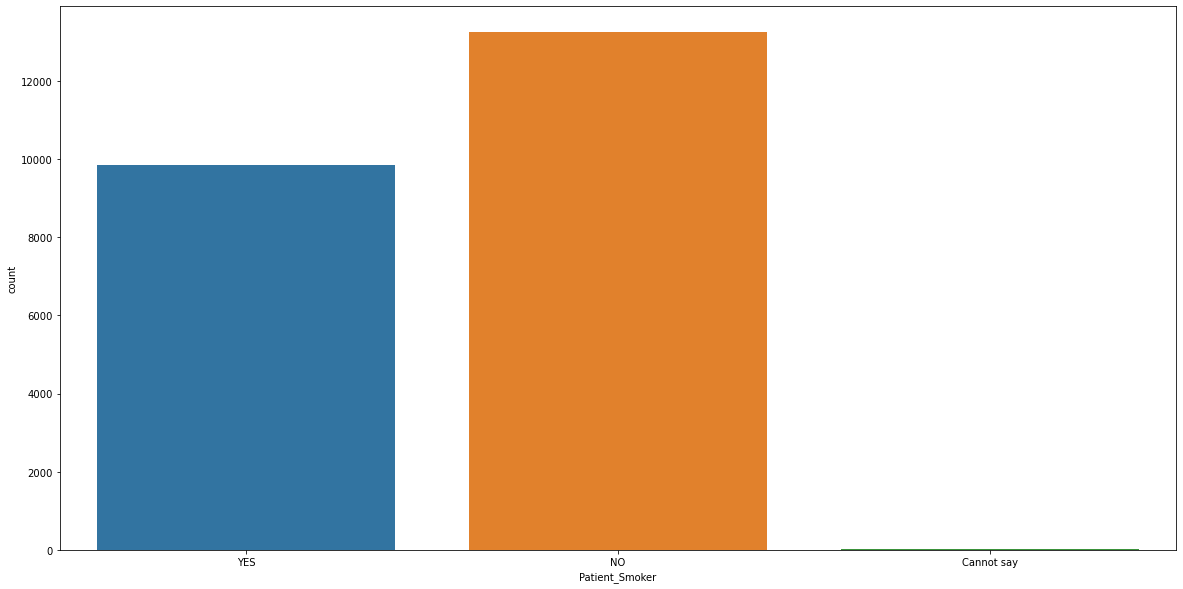

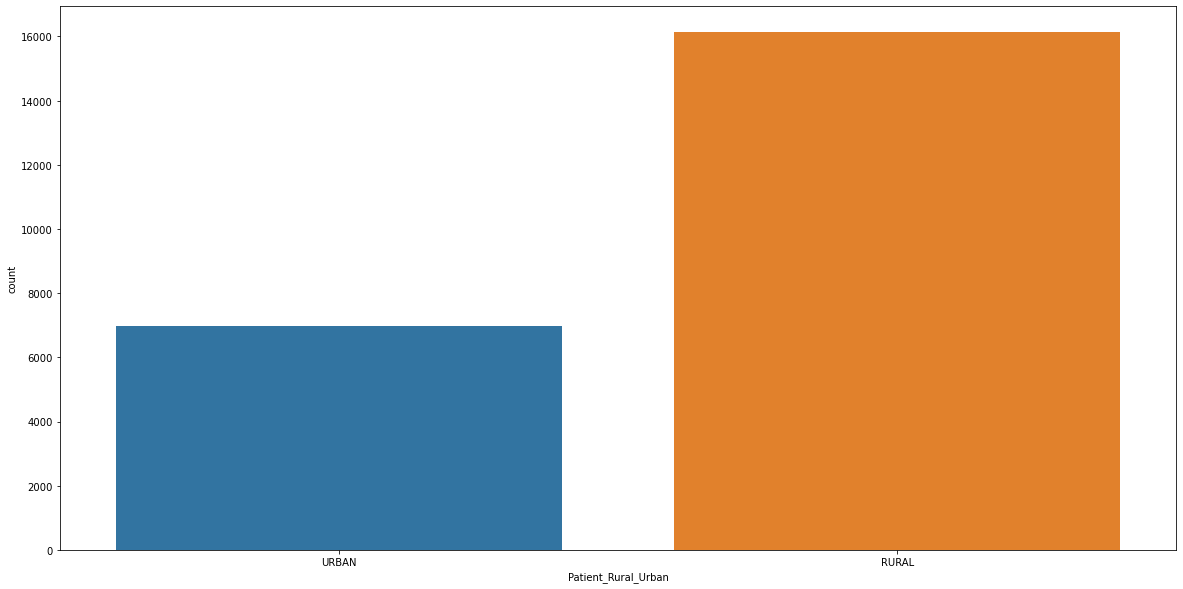

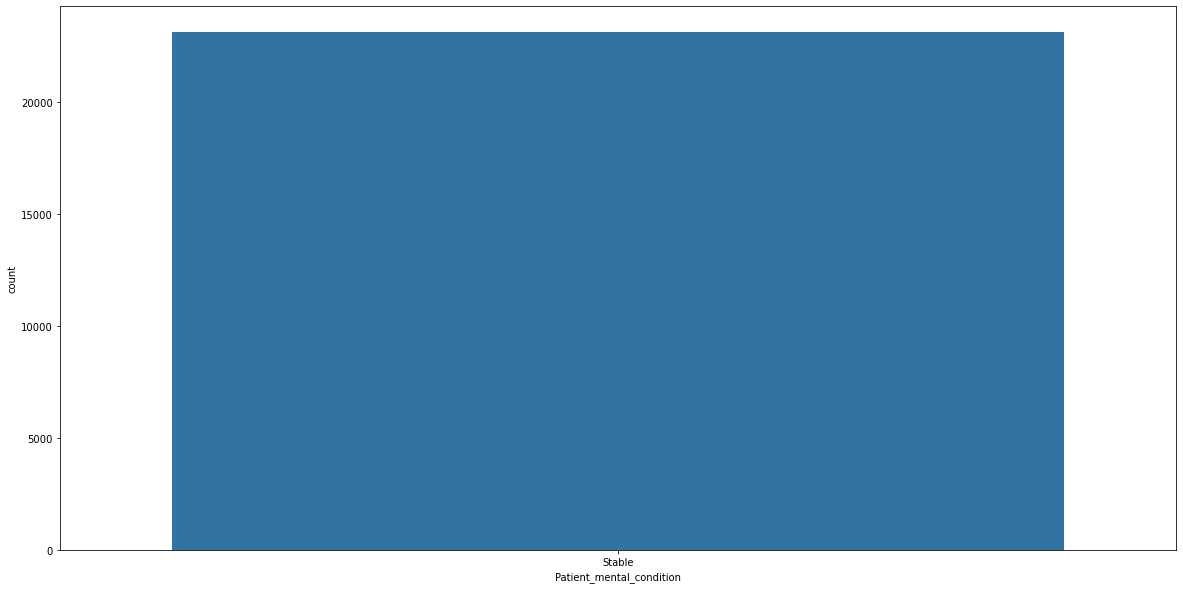

In [38]:
#Let's see the count for each value in the categrical data
cateogrical_cols = ['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']
for col in cateogrical_cols:
    plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=pharma_data)
    plt.show()

From the above figures the Patient mental condition for all patients are stable so this feature can also be dropped as there is no variation in the patient mental condition.

In [42]:
#Let's now fill the na values for A-Z and Number of prev cond before doing the correlation matrix
na_col = ['A', 'B', 'C', 'D','E', 'F', 'Z', 'Number_of_prev_cond']
for col in na_col:
    pharma_data[col] = pharma_data[col].fillna(pharma_data[col].mode()[0])

pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

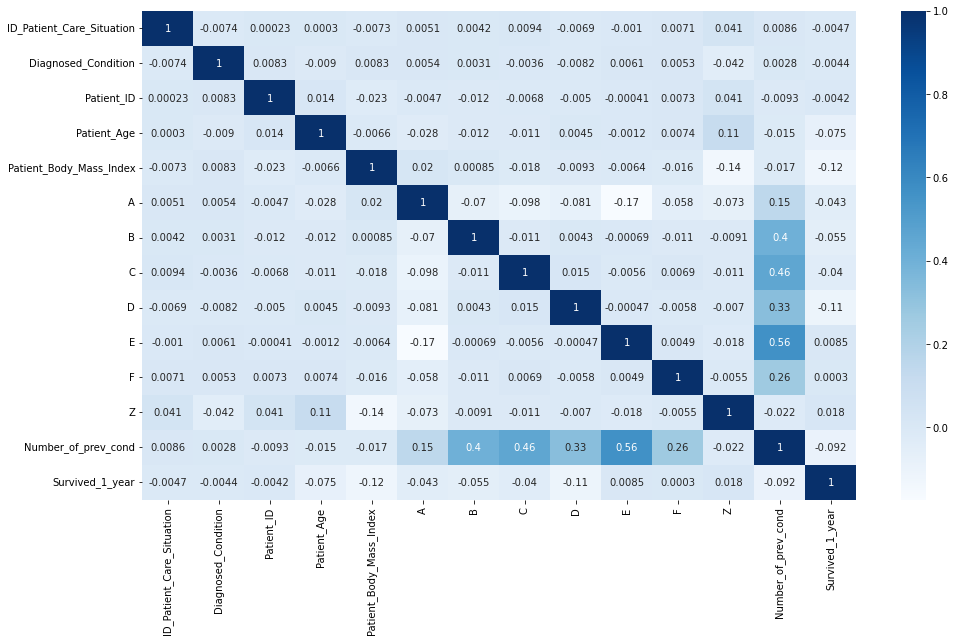

In [43]:
plt.figure(figsize=(16,9))
_ = sns.heatmap(pharma_data.corr(), annot=True, cmap='Blues')

According to the heatmap the A-Z condiitons are the most correltaed features to the number of Prev. condtions and as this parameter is equal to the sum of A-Z conditons then number of Prev. condiitons will be kept and the others will be dropped.

In [45]:
#Let's finalise the data from before appying the model
pharma_data = pharma_data.drop(['A', 'B', 'C', 'D','E', 'F', 'Z', 
                                'ID_Patient_Care_Situation', 
                                'Patient_mental_condition',
                               'Patient_ID'], axis=1)

In [47]:
pharma_data.head()
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Treated_with_drugs       23084 non-null  object 
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  object 
 5   Patient_Rural_Urban      23097 non-null  object 
 6   Number_of_prev_cond      23097 non-null  float64
 7   Survived_1_year          23097 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB


The final steps before applying the classifier is to drop the na values from Treated with drugs.

In [50]:
pharma_data = pharma_data.dropna()
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23084 non-null  int64  
 1   Treated_with_drugs       23084 non-null  object 
 2   Patient_Age              23084 non-null  int64  
 3   Patient_Body_Mass_Index  23084 non-null  float64
 4   Patient_Smoker           23084 non-null  object 
 5   Patient_Rural_Urban      23084 non-null  object 
 6   Number_of_prev_cond      23084 non-null  float64
 7   Survived_1_year          23084 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


In [51]:
#Let's prepare the test_data
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [52]:
test_data = test_data.drop(['A', 'B', 'C', 'D','E', 'F', 'Z', 
                                'ID_Patient_Care_Situation', 
                                'Patient_mental_condition',
                               'Patient_ID'], axis=1)

In [53]:
test_data.head()

Diagnosed_Condition Treated_with_drugs  Patient_Age  \
0                   40               DX3            16   
1                   52                DX6           24   
2                   50           DX4 DX5            63   
3                   32                DX6           42   
4                   20               DX3            50   

   Patient_Body_Mass_Index Patient_Smoker Patient_Rural_Urban  \
0                29.443894             NO               RURAL   
1                26.836321             NO               URBAN   
2                25.523280             NO               RURAL   
3                27.171155             NO               URBAN   
4                25.556192             NO               RURAL   

   Number_of_prev_cond  
0                  2.0  
1                  2.0  
2                  2.0  
3                  3.0  
4                  1.0

In [86]:
#Final preparation for model classifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector as selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

def pipline_model(data, target, preprocessor, classifier):
    model = make_pipeline(preprocessor, classifier)
    cv_results = cross_val_score(model, data, target, scoring="f1")
    print(f"{classifier} accuracy: {cv_results.mean():.3f}")
    
#select the data and target
data = pharma_data.drop('Survived_1_year', axis=1)
target = pharma_data['Survived_1_year']
numerical_cols = selector(dtype_exclude=object)
categorical_cols = selector(dtype_include=object)
numerical_data = numerical_cols(data)
cateogrical_data = categorical_cols(data)

#Apply standard scaler for numerical data and OneHotEncoder for categrical data
numerical_preproc = StandardScaler()
categorical_preproc = OneHotEncoder()
preproc = ColumnTransformer([('Standard_Scaler', numerical_preproc, numerical_data ),
                            ('One_Hot_Encoder', categorical_preproc, cateogrical_data)])

classifers = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), 
              KNeighborsClassifier(), SVC()]
              
for classifier in classifers:
              pipline_model(data, target, preproc, classifier)


LogisticRegression(max_iter=1000) accuracy: 0.797
DecisionTreeClassifier() accuracy: 0.804
KNeighborsClassifier() accuracy: 0.815
SVC() accuracy: 0.838


In [99]:
#We will apply the HistGradientBoostingClassifier to compare it to the above classifiers
clf = HistGradientBoostingClassifier()
clf.fit(pd.get_dummies(data), target)
clf.score(pd.get_dummies(data), target)

0.8462138277594871

From the above results we can see that HistGradientBoostingClassifier is the best model in terms of score.

In [100]:
#Finally apply the model on the test data
pred = pd.DataFrame({'prediction':clf.predict(pd.get_dummies(test_data))})
                    
pred.to_csv('Submission.csv', index=False)